## Write A Data Science Blog Post
##### by Markus Müller


Content:
XXX


Three Questions:
1. Availability and prive development
2. which neighborhoods are most expensive
3. What feature predicts price 

Data: Boston Airbnb Open Data from <a href='https://www.kaggle.com/airbnb/boston'>Kaggle</a>

Structure:
- listings: full descriptions and average review score
- reviews: unique id for each reviewer and detailed comments
- calendar: listing id and the price and availability for that day

In [163]:
# imports
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [2]:
# create folder
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
calendar = pd.read_csv('Data/calendar.csv')
listings = pd.read_csv('Data/listings.csv')
reviews = pd.read_csv('Data/reviews.csv')

In [4]:
calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
calendar[calendar['price'].notna()]

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [7]:
# availabe (t = True / f = False)
calendar.query('available == "f"')

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [8]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [10]:
# used this cell to visually assess different columns
listings[['id', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee']]

,id,price,weekly_price,monthly_price,cleaning_fee
0,12147973,$250.00,NaN,NaN,$35.00
1,3075044,$65.00,$400.00,NaN,$10.00
2,6976,$65.00,$395.00,"$1,350.00",NaN
3,1436513,$75.00,NaN,NaN,$50.00
4,7651065,$79.00,NaN,NaN,$15.00
...,...,...,...,...,...
3580,8373729,$69.00,NaN,NaN,NaN
3581,14844274,$150.00,NaN,NaN,$15.00
3582,14585486,$198.00,NaN,NaN,NaN
3583,14603878,$65.00,NaN,NaN,NaN


In [136]:
# used this cell to visually assess different columns
listings[['id', 'host_since', 'first_review', 'last_review', 'neighbourhood', 'neighbourhood_cleansed', 'property_type']]

,id,host_since,first_review,last_review,neighbourhood,neighbourhood_cleansed,property_type
0,12147973,2015-04-15,NaN,NaN,Roslindale,Roslindale,House
1,3075044,2012-06-07,2014-06-01,2016-08-13,Roslindale,Roslindale,Apartment
2,6976,2009-05-11,2009-07-19,2016-08-05,Roslindale,Roslindale,Apartment
3,1436513,2013-04-21,2016-08-28,2016-08-28,NaN,Roslindale,House
4,7651065,2014-05-11,2015-08-18,2016-09-01,Roslindale,Roslindale,House
...,...,...,...,...,...,...,...
3580,8373729,2014-07-31,2015-09-18,2016-08-27,Somerville,Charlestown,Apartment
3581,14844274,2015-07-02,NaN,NaN,NaN,Allston,Apartment
3582,14585486,2014-01-14,NaN,NaN,NaN,Charlestown,Apartment
3583,14603878,2016-05-27,2016-08-27,2016-09-04,Somerville,Charlestown,Apartment


In [12]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


### Data Assessment

##### calendar
- price is an object 
- date column should be a DateTimeObject
- missing values in the price column

##### lisitings
- price in an object 
- host_since should be a DateTimeObject

##### reviews
- date column should be a DateTimeObject

### Data Cleaning

In [90]:
# copy DataFrames
calendar_clean = calendar.copy()
listings_clean = listings.copy()
reviews_clean = reviews.copy()

In [103]:
# function to clean and transform 
def clean_price(df, p_column):
    df['price_clean'] = df[p_column].str.replace('$', '')
    df['price_clean'] = df['price_clean'].str.replace(',', '')
    df['price_clean'] = df['price_clean'].astype(float)
    df.drop(columns=p_column, inplace=True)

In [104]:
clean_price(calendar_clean, 'price')
clean_price(listings_clean, 'price')

In [28]:
calendar_clean['listing_id'].nunique()

3585

In [29]:
listings['id'].nunique()

3585

In [30]:
calendar_clean['price_clean'].value_counts()

150.0     20752
65.0      17518
75.0      16249
100.0     15499
200.0     14326
          ...  
2415.0        1
1148.0        1
1149.0        1
2046.0        1
1617.0        1
Name: price_clean, Length: 1246, dtype: int64

In [46]:
listings_clean['price_clean'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price_clean, Length: 324, dtype: int64

##### missing values in the price column
- isn't a problem beacuse if a price is missing, than AirBnB isn' available

##### transforme date to DateTimeObject

In [93]:
calendar_clean['date'] = pd.to_datetime(calendar_clean['date'], format='%Y-%m-%d')
listings_clean['host_since'] = pd.to_datetime(listings_clean['host_since'], format='%Y-%m-%d')
reviews_clean['date'] = pd.to_datetime(reviews_clean['date'], format='%Y-%m-%d')

### Visualizations

In [60]:
calendar_clean['price_clean'].describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price_clean, dtype: float64

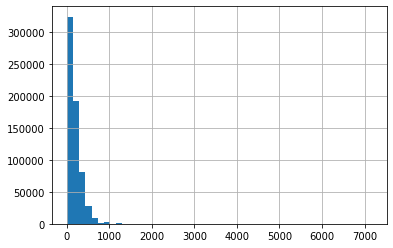

In [55]:
calendar_clean['price_clean'].hist(bins=50);

In [61]:
listings_clean['price_clean'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price_clean, dtype: float64

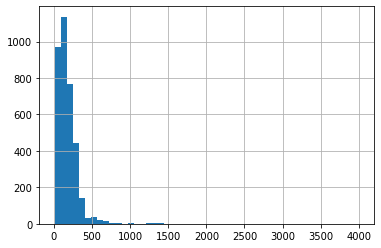

In [59]:
listings_clean['price_clean'].hist(bins=50);

I assume that the price in the listings table refelct the price from the day that the data was scraped, whereas the price in the calendar DataFrame shows the price of an individuall listing over the timeperiod

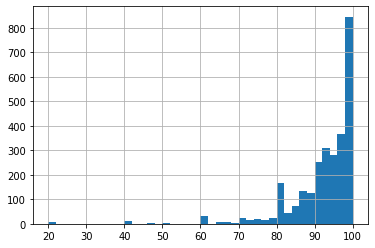

In [178]:
listings_clean['review_scores_rating'].hist(bins=40);

skewed to the left; most of the reviews are positive

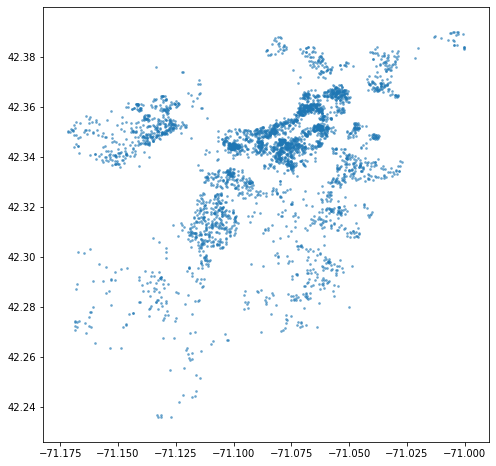

In [23]:
plt.subplots(figsize=(8,8))
plt.scatter(listings['longitude'], listings['latitude'], s=3, alpha=0.5);

### Question X: Availability

In [94]:
# create a DataFrame for each instance
available = calendar_clean.query('available == "t"')
#not_available = calendar_clean.query('available == "f"')

In [107]:
available_price = calendar_clean.query('available =="t"').groupby('date')['price_clean'].mean()

In [95]:
# grouoby date to see the availability of each day
available = available.groupby('date').count()
not_available = not_available.groupby('date').count()

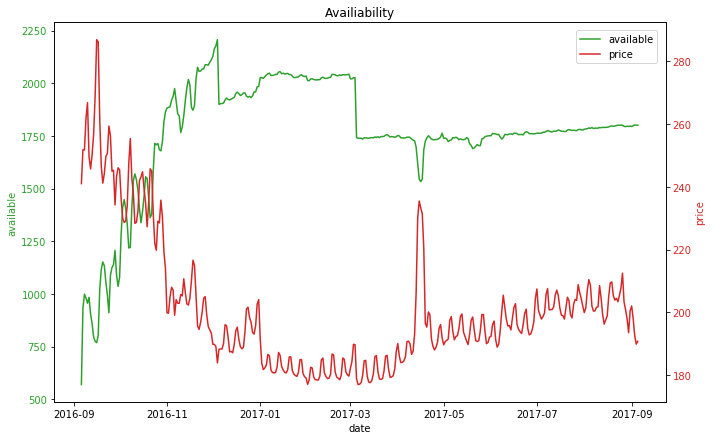

In [134]:
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:green'
ax1.set_xlabel('date')
ax1.set_ylabel('available', color=color)
ax1.plot(available.index, available['listing_id'], label = 'available', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price', color=color)  # we already handled the x-label with ax1
ax2.plot(available_price.index, available_price.values, label = 'price', color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Availiability')
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.96));
# https://matplotlib.org/gallery/api/two_scales.html

- there seems to be some seasonality in the price, because it has almost the same pattern 

In [ ]:
# to do
# - day of week analysis workday vs weekend mean price 

### Question X: Neighberhoods

In [137]:
listings_clean[['id', 'neighbourhood', 'neighbourhood_cleansed', 'price_clean']]

,id,neighbourhood,neighbourhood_cleansed,price_clean
0,12147973,Roslindale,Roslindale,250.0
1,3075044,Roslindale,Roslindale,65.0
2,6976,Roslindale,Roslindale,65.0
3,1436513,NaN,Roslindale,75.0
4,7651065,Roslindale,Roslindale,79.0
...,...,...,...,...
3580,8373729,Somerville,Charlestown,69.0
3581,14844274,NaN,Allston,150.0
3582,14585486,NaN,Charlestown,198.0
3583,14603878,Somerville,Charlestown,65.0


In [140]:
listings_clean['neighbourhood_cleansed'].nunique()

25

In [143]:
listings_clean['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [148]:
listings_clean.groupby('neighbourhood_cleansed')['price_clean'].mean().sort_values(ascending = False)

neighbourhood_cleansed
South Boston Waterfront    306.060241
Bay Village                266.833333
Leather District           253.600000
Back Bay                   240.950331
Downtown                   236.459302
Chinatown                  232.352113
Beacon Hill                224.443299
Fenway                     220.393103
West End                   209.591837
South End                  204.349693
Charlestown                198.045045
North End                  195.678322
South Boston               187.609195
Roxbury                    146.333333
Jamaica Plain              138.478134
Longwood Medical Area      138.444444
Mission Hill               121.967742
East Boston                119.153333
Brighton                   118.767568
Allston                    112.307692
West Roxbury               107.108696
Roslindale                  98.428571
Dorchester                  91.639405
Hyde Park                   86.548387
Mattapan                    75.125000
Name: price_clean, dtype: f

In [150]:
listings_clean.groupby('neighbourhood_cleansed')['price_clean'].max().sort_values(ascending = False).head(5)

neighbourhood_cleansed
Fenway                     4000.0
South Boston Waterfront    3000.0
Roxbury                    1400.0
Beacon Hill                1345.0
South End                  1300.0
Name: price_clean, dtype: float64

### Question X: What contributes to a high price

In [152]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [161]:
#colums which could be ralated to the price 
price_corr = listings_clean[['price_clean', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

In [157]:
# review_score_rating is the combinatiom of the other reveiw_scores
# listings_clean[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#                'review_scores_communication', 'review_scores_location', 'review_scores_value']]

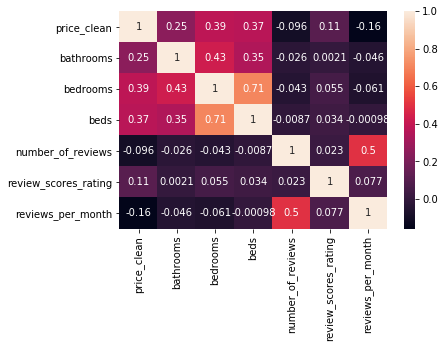

In [165]:
sns.heatmap(price_corr.corr(), annot=True);

There are some medium correlations for bathrooms, bedrooms, bad and very small correlations for review and review per month. Intersting is that a high reveiw doesn't seem to affact price.

In [184]:
score = listings_clean.groupby('review_scores_rating')['price_clean'].mean().index
mean_price = listings_clean.groupby('review_scores_rating')['price_clean'].mean().values

<BarContainer object of 48 artists>

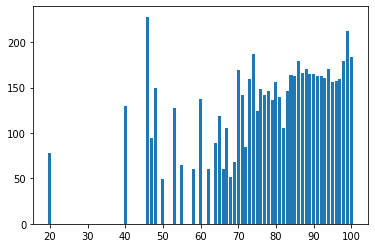

In [185]:
plt.bar(x=score, height=mean_price)

#### Create model for price predicting
What features should the model includ?
- `neighbourhood_cleansed` showed varianze between different neighbourhoods.
- `bathrooms` as well as `bedromms` had a medium correlation, bad as well but it is highly correlated with beadrooms so we can drop it 
- `review_scores_rating` hadn't a high correlation and the visual assesment didn't show an obvios pattern 
- `square_feet` would be interesting, but there are to many missing values

### Resources
- https://matplotlib.org/gallery/api/two_scales.html